In [13]:
# -----------------------------
# geography_exploration.ipynb
# -----------------------------

# 1️⃣ Imports et préparation
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

# Remonter à la racine du projet pour accéder au dossier src
sys.path.append(os.path.abspath(".."))

# Importer la classe depuis ton fichier .py
from src.geography_analysis import GeographyAnalyzer

# 2️⃣ Lecture des fichiers CSV
biden = pd.read_csv("../data/biden_clean.csv", sep=";")
trump = pd.read_csv("../data/trump_clean.csv", sep=";")

# Vérification rapide
print("Biden:", biden.shape)
print("Trump:", trump.shape)
biden.head()

C:\Users\user\AppData\Local\Temp\ipykernel_31624\1355503541.py:17: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  biden = pd.read_csv("../data/biden_clean.csv", sep=";")
C:\Users\user\AppData\Local\Temp\ipykernel_31624\1355503541.py:18: DtypeWarning: Columns (6,20) have mixed types. Specify dtype option on import or set low_memory=False.
  trump = pd.read_csv("../data/trump_clean.csv", sep=";")


Biden: (538925, 25)
Trump: (671696, 25)


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,city,country,continent,state,state_code,collected_at,target,text_clean,is_retweet,tweet_original
0,2020-10-15 00:00:01+00:00,1.316529e+18,elecciones2020 en florida joebiden dice que do...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,noticias de interés para latinos de la costa e...,...,NaN,united states of america,North America,florida,FL,2020-10-21 00:00:00+00:00,Biden,elecciones2020 en florida joebiden dice que do...,False,#Elecciones2020 | En #Florida: #JoeBiden dice ...
1,2020-10-15 00:00:20+00:00,1.316529e+18,user user user this is how biden made his trum...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,NaN,united states of america,North America,montana,MT,NaN,Biden,user user user this is how biden made his trum...,False,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...
2,2020-10-15 00:00:22+00:00,1.316529e+18,censorship hunterbiden biden bidenemails biden...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,a silicon valley independent news media startu...,...,NaN,united states of america,North America,california,CA,NaN,Biden,censorship hunterbiden biden bidenemails biden...,False,#censorship #HunterBiden #Biden #BidenEmails #...
3,2020-10-15 00:00:25+00:00,1.316529e+18,in 2020 nypost is being censorship censored by...,0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,illinois home of lincoln and reagan used to be...,...,chicago,united states of america,North America,illinois,IL,NaN,Biden,in 2020 nypost is being censorship censored by...,False,"In 2020, #NYPost is being #censorship #CENSORE..."
4,2020-10-15 00:00:31+00:00,1.316529e+18,tell politicians to stick it with this free it...,0.0,0.0,Freebie-Depot,1.030832e+08,🆓 Freebie Depot,FreebieDepot,free stuff no fluff get all kinds of free stuf...,...,NaN,NaN,NaN,NaN,NaN,NaN,Biden,tell politicians to stick it with this free it...,False,►► Tell Politicians to STICK IT with this FREE...


In [14]:
# 3️⃣ Filtrage pour ne garder que les États US

# Liste des 50 états US + DC
us_states = [
    'ALABAMA','ALASKA','ARIZONA','ARKANSAS','CALIFORNIA','COLORADO','CONNECTICUT',
    'DELAWARE','FLORIDA','GEORGIA','HAWAII','IDAHO','ILLINOIS','INDIANA','IOWA',
    'KANSAS','KENTUCKY','LOUISIANA','MAINE','MARYLAND','MASSACHUSETTS','MICHIGAN',
    'MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA','NEVADA','NEW HAMPSHIRE',
    'NEW JERSEY','NEW MEXICO','NEW YORK','NORTH CAROLINA','NORTH DAKOTA','OHIO',
    'OKLAHOMA','OREGON','PENNSYLVANIA','RHODE ISLAND','SOUTH CAROLINA','SOUTH DAKOTA',
    'TENNESSEE','TEXAS','UTAH','VERMONT','VIRGINIA','WASHINGTON','WEST VIRGINIA',
    'WISCONSIN','WYOMING','DISTRICT OF COLUMBIA'
]

# Filtrer uniquement les États US
biden_us = biden[biden['state'].str.upper().isin(us_states)]
trump_us = trump[trump['state'].str.upper().isin(us_states)]

print("Biden US:", biden_us.shape)
print("Trump US:", trump_us.shape)

Biden US: (152780, 25)
Trump US: (178182, 25)


In [15]:
# 4️⃣ Création des analyzers et comparaison
biden_geo = GeographyAnalyzer(biden_us, "Biden")
trump_geo = GeographyAnalyzer(trump_us, "Trump")

# Comparer les tweets par état
comparison_us = biden_geo.comparison_with(trump_geo)
comparison_us_top10 = comparison_us.sort_values(by="Biden", ascending=False).head(10)

print(comparison_us_top10)

                      Biden  Trump
state                             
CALIFORNIA            25771  31126
NEW YORK              20962  22855
TEXAS                 14164  16471
FLORIDA               13261  16554
DISTRICT OF COLUMBIA   7042   9678
ILLINOIS               5493   6774
PENNSYLVANIA           5394   7002
OHIO                   4410   3854
NEW JERSEY             3957   5034
MASSACHUSETTS          3721   4718


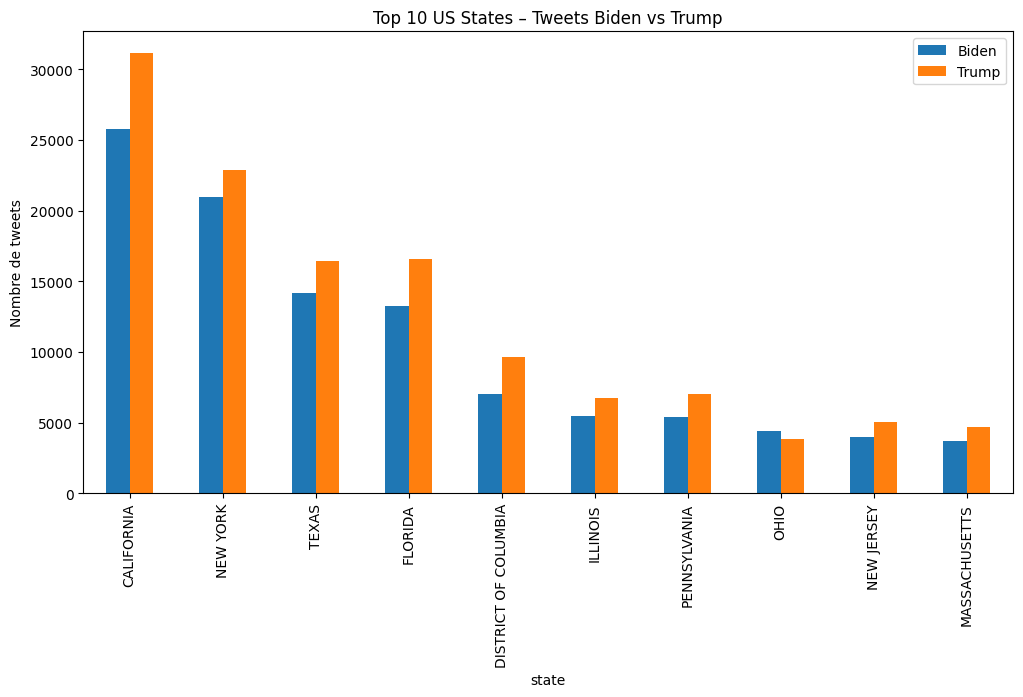

In [16]:
# 5️⃣ Visualisation
comparison_us_top10.plot(
    kind='bar',
    figsize=(12,6),
    title="Top 10 US States – Tweets Biden vs Trump"
)
plt.ylabel("Nombre de tweets")
plt.show()

In [17]:
from src.geography_analysis import GeographyAnalyzer

# Création des analyzers
biden_geo = GeographyAnalyzer(biden, "Biden")
trump_geo = GeographyAnalyzer(trump, "Trump")

# Filtrer uniquement les États US
biden_us = biden_geo.filter_us_states()
trump_us = trump_geo.filter_us_states()

# Comparaison
comparison_us = biden_geo.comparison_with(trump_geo)
print(comparison_us.head(10))

                            Biden  Trump
state                                   
2020 10 27 17 42 34 094050    0.0    1.0
2020 10 27 17 47 46 022213    0.0    1.0
AARGAU                        1.0    3.0
ABIA                          2.0    1.0
ABIDJAN                       6.0   10.0
ABRUZZO                      56.0   46.0
ABU DHABI EMIRATE            80.0   57.0
ACEH                         23.0   24.0
ADDIS ABABA                  22.0   48.0
AEGEAN                        1.0    5.0
